In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from matplotlib import pyplot as plt


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.main =  nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        return self.main(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
train_dataset = datasets.MNIST('./data', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ]))

In [2]:
model = torch.load("mnistNet.pth",map_location=torch.device('cpu'))
model

NeuralNetwork(
  (main): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)

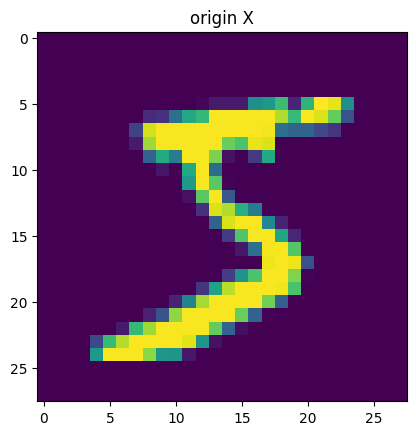

In [3]:
X,y = train_dataset[0]
X.requires_grad_()
y = torch.tensor([y])

plt.imshow(X.detach()[0,...])
plt.title("origin X")
plt.show()

In [4]:
y_ = model(X)
loss = F.cross_entropy(y_,y)

X.retain_grad()
loss.backward()

with torch.no_grad():
    original_pred = F.softmax(y_,dim=1).argmax().item()

original_pred

5

In [8]:
epsilon = .1
noise = torch.sign(X.grad)
with torch.no_grad():
    attackedX = X + epsilon * noise
    attacked_pred = F.softmax(model(attackedX),dim=1).argmax().item()

attacked_pred

3

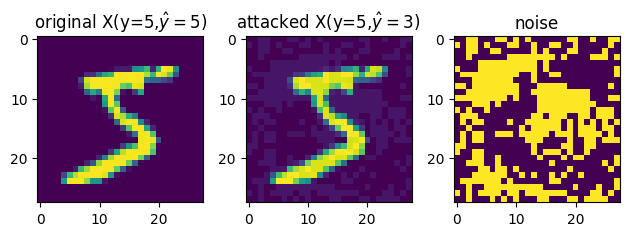

In [12]:
fig,axes = plt.subplots(1,3)

axes[0].imshow(X.detach()[0,...])
axes[0].set_title(f"original X(y={y.item()},$\hat y=${original_pred})")

axes[1].imshow(attackedX.detach()[0,...])
axes[1].set_title(f"attacked X(y={y.item()},$\hat y=${attacked_pred})")

axes[2].imshow(noise.detach()[0,...])
axes[2].set_title("noise")

plt.tight_layout()
plt.show()